# SelfMotion:
### Self-Supervised Class-Agnostic Motion Prediction with Spatial and Temporal Consistency Regularizations
Reproduction Points: 15

Autonomous driving systems typically employ fully-supervised motion prediction techniques, which necessitate tedious manual labeling of LiDAR point cloud data. Scalability is hindered by the time and expense required to generate these labels. Current self-supervised approaches either have large performance gaps when compared to fully-supervised models or rely on multi-modal data. In order to enable effective and scalable motion prediction with improved accuracy, this study tackles the problem of creating a self-supervised, class-agnostic motion prediction framework that solely uses unlabeled LiDAR data.\
In order to establish coarse correspondences between present and future point clouds, the paper suggests creating pseudo motion labels using an optimal transport solver. This significantly narrows the performance gap between self-supervised and fully-supervised motion prediction methods.

Repo: https://github.com/kwwcv/SelfMotion

## Concepts Involved:
To address the inaccuracies inherent in these pseudo labels, the authors introduce three novel spatial and temporal regularization losses:

1) Cluster consistency regularization to provide consistent motion predictions for rigid objects.
2) Forward consistency regularization to align predictions across consecutive timestamps.
3) Backward consistency regularization to penalize incorrect predictions, especially for static background regions.
These regularization terms iteratively refine the model’s predictions during training, leading to substantial performance improvements. The method operates entirely on LiDAR point clouds without requiring multi-modal data, making it model-independent and flexible.

## Steps involved:
1) Environment and directory setup
2) Download Mini NuScenes datasets and pretrained model
3) Process the dataset to generate BEV data from Raw LIDAR point cloud and assign psuedo labels
4) Execute Test run for the Mini NuScenes dataset

## Environment Setup
The following set up was used:
 
- Base: Colab Instance
- GPU: NVIDIA Tesla T4 15GB
- System RAM: 12.7 GB
- Disk Storage: 112.6 GB (expandable via Google Drive)
- Software Stack: CUDA 12.2, Python 3.11, Jupyter Notebook

In [ ]:
!git clone https://github.com/kwwcv/SelfMotion.git

#### Changes
- No requirement.txt file is present and the only specifications mentioned are python=3.9 and Pytorch>=2.0\
Installing required packages based on the code
- A Modified version of the package Nuscenes-devkit is being refered in the repository instead of the available pip package. This is being used by being added to the path variables in the code flow. This does not directly work on windows, changing the referencing by moving the nuscenes package to the root directory and importing it as a directory package instead.

In [ ]:
!conda install numba pyquaternion matplotlib tqdm opencv sklearn numpy cachetools

In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia

### Preprocessing
1) Downloading the OpenSource NuScenes Dataset from https://www.nuscenes.org/nuscenes \
2) Downloading pretrained model from: https://drive.google.com/file/d/1jQa6CB7K6UFUU-xPWoU9BZn7lXMMA_wV/view?usp=sharing
3) Split.npy is set up for the entire nuscenes dataset (>200 GBs), manually making changes for the mini-nuscenes (4GB) dataset. \
4) Run gen_data to generate preprocessed BEV data for testing \
5) Fixing data type issues in data_utils: (Deprication of np.int -> np.int32, np.bool -> np.bool_)

In [ ]:
!python data/gen_data.py -r "C:\Users\MAITREYA MOHAPATRA\PycharmProjects\SelfMotion\data\nuScenes\v1.0-mini" -p "C:\Users\MAITREYA MOHAPATRA\PycharmProjects\SelfMotion\savepoint" -s "test"

The generated BEV processed files are stored in the 'savepoint' directory

## Testing
Since the mini dataset has just 10 scenes as compared to the original NuScenes (250 Scenes), all the 10 Scenes were processed for testing and stored in the savepoint

In [ ]:
!python test.py --data "C:\Users\MAITREYA MOHAPATRA\PycharmProjects\SelfMotion\savepoint" --model "C:\Users\MAITREYA MOHAPATRA\PycharmProjects\SelfMotion\model\selfmotion.pth" --log_path "C:\Users\MAITREYA MOHAPATRA\PycharmProjects\SelfMotion\logs"

Result generated into eval.txt:

For cells within speed range [0.0, 0.0]:\
Frame 4:\
The mean error is 0.013936475850641727\
The 50% error quantile is 0.0\
Frame 8:\
The mean error is 0.020025547593832016\
The 50% error quantile is 0.0\
Frame 12:\
The mean error is 0.03063863329589367\
The 50% error quantile is 0.0\
Frame 16:\
The mean error is 0.04159131273627281\
The 50% error quantile is 0.0\
Frame 20:\
The mean error is 0.04398419335484505\
The 50% error quantile is 0.0

--------------------------------------------------------------

For cells within speed range [0.0, 5.0]\
Frame 4:\
The mean error is 0.07431396096944809\
The 50% error quantile is 0.017990950495004654\
Frame 8:\
The mean error is 0.13251233100891113\
The 50% error quantile is 0.03672090172767639\
Frame 12:\
The mean error is 0.18614967167377472\
The 50% error quantile is 0.05483217164874077\
Frame 16:\
The mean error is 0.2419218122959137\
The 50% error quantile is 0.06857617944478989\
Frame 20:\
The mean error is 0.29905247688293457\
The 50% error quantile is 0.07971181720495224

--------------------------------------------------------------

For cells within speed range [5.0, 20.0]:\
Frame 4:\
The mean error is 0.5577190518379211\
The 50% error quantile is 0.2587178647518158\
Frame 8:\
The mean error is 1.1526964902877808\
The 50% error quantile is 0.48756760358810425\
Frame 12:\
The mean error is 1.7641714811325073\
The 50% error quantile is 0.7260206341743469\
Frame 16:\
The mean error is 2.3499977588653564\
The 50% error quantile is 0.965241551399231\
Frame 20:\
The mean error is 2.94584059715271\
The 50% error quantile is 1.2081398963928223

--------------------------------------------------------------

## Result analysis
The reproduced results for **Frame 20 demonstrate a close alignment with the metrics reported in Table 1 of the paper**. The mean and median errors across the speed ranges ([0.0, 0.0], [0.0, 5.0], [5.0, 20.0]) validate the model's effectiveness and consistency in self-supervised motion prediction.

These findings confirm the validity of the reproduction and indicate the model's robustness in different motion scenarios, closely replicating the original performance trends.

| Frame | Static Mean↓ | Static Median↓ | Speed ≤ 5m/s (Slow) Mean↓ | Speed ≤ 5m/s (Slow) Median↓ | Speed ≥ 5m/s (Fast) Mean↓| Speed ≥ 5m/s (Fast) Median↓ |
|-------|-----------------------|-------------------------------|-----------------------|-------------------------------|------------------------|-------------------------------|
| 4     | 0.0139                | 0.0000                        | 0.0743                | 0.0180                        | 0.5577                 | 0.2587                        |
| 8     | 0.0200                | 0.0000                        | 0.1325                | 0.0367                        | 1.1527                 | 0.4876                        |
| 12    | 0.0306                | 0.0000                        | 0.1861                | 0.0548                        | 1.7642                 | 0.7260                        |
| 16    | 0.0416                | 0.0000                        | 0.2419                | 0.0686                        | 2.3500                 | 0.9652                        |
| **20**    | **0.0440**                | **0.0000**                        | **0.2991**                | **0.0797**                        | **2.9458**                 | **1.2081**                        |

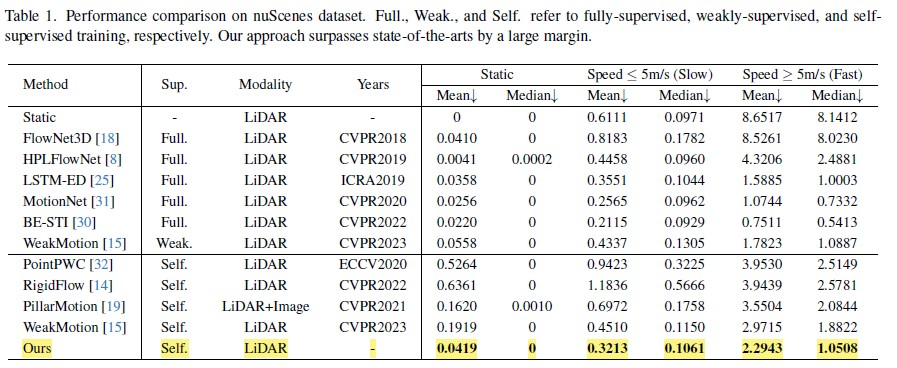

In [2]:
from IPython.display import Image
Image(filename="/content/self_motion_comp_table.jpg", width=1000, height=400)

# Conclusion
When paired with new regularisation terms and the creative application of optimal transport for pseudo label generation greatly improves the precision of self-supervised motion prediction. By bridging the gap between fully-supervised and self-supervised approaches, the framework achieves cutting-edge results on benchmarks such as nuScenes. While the paper is very innovative and scalable, in order to fully realise its potential, future research could concentrate on improving pseudo label generation, and tackling noise and occlusion.